In [70]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.special import gammainc, gamma

## 9 номер

### пункт а)

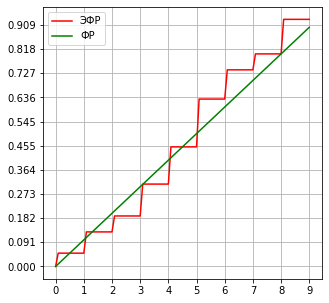

In [71]:
n = 100
array = [5, 8, 6, 12, 14, 18, 11, 6, 13, 7]

sample = []
for i in range(10):
    sample.extend([i for j in range(array[i])])
    
points = np.linspace(0, 9, 100)
emp = [np.sum(sample<el)/n for el in points]
F = [x/10 for x in points]

fig, ax = plt.subplots(figsize=(5,5))
ax.grid()

ax.set_xticks(np.linspace(0, 10, 11))
ax.set_yticks(np.linspace(0, 1, 12))


ax.plot(points, emp, color = 'r', label ='ЭФР')
ax.plot(points, F, color = 'g', label ='ФР')

ax.legend()


In [72]:
delta = max(list(map(lambda x,y: abs(x-y), f_acc, f_emp))) * n**0.5
delta

1.3090909090909086

### пункт b)

In [73]:
def gauss(x, mean, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * sigma**2) )

borders = [i/10 for i in range(5, 86, 10)]
borders.insert(0, -np.inf)
borders.append(np.inf)

sigmas = np.linspace(1, 5, 100)
means = np.linspace(0, 7, 100)

l_max = 0
p_best = tuple()
for i in sigmas:
    for j in means:
        p = []
        for k in range(len(borders) - 1):
            p.append(integrate.quad(gauss, borders[k], borders[k+1], args = (j, i))[0])
        l = np.prod(list(map(lambda x, y: x**y, p, array)))
        if l > l_max:
            l_max = l
            p_best = (j, i)


In [74]:
sigma = round(p_best[1], 2)
sigma

2.7

In [75]:
a = round(p_best[0], 2)
a

4.81

In [76]:
mean, sigma = p_best
al_ = []
for i in range(len(borders) - 1):
    al_.append(integrate.quad(gauss, borders[i], borders[i+1], args = (mean, sigma))[0])
    
deltas = []
for i in range(10):
    deltas.append((array[i] - n*al_[i])**2/(n*al_[i]))
delta_hi = np.sum(deltas)



In [77]:
delta_h = round(delta_hi, 3)
delta_h

9.767

### b) Колмогоров

In [78]:

sample_first = []
for i in range(10):
    sample_first.extend([i for j in range(array[i])])
    
deltas_kolm = []
for i in range(50000):
    sample = np.random.normal(mean, sigma, n)
    points = np.linspace(0, max(max(sample), 9), 100)
    f1 = [np.sum(sample<elem)/n for elem in points]
    f2 = [np.sum(sample_first<elem)/n for elem in points]
    tmp = 10*max(list(map(lambda x,y: abs(x-y), f1, f2)))
    deltas_kolm.append(tmp)

deltas_var = np.sort(deltas_kolm)
k = len(deltas_var[deltas_var<1.299999])
p_value = 1-((k-1)/N)


In [79]:
p_value

0.53566

### c)

In [80]:
mean = np.mean(sample_first)
sigma = np.std(sample_first)

In [81]:
sigma

2.505414137423193

In [82]:
a

4.81

In [83]:
def cdf_hi2(x, k):
    return 3*gammainc(k/2, x/2)/gamma(k/2)

points = np.linspace(0, 30, 1000)
hi_7 = []
hi_9 = []
for x in points:
    hi_7.append(integrate.quad(chi2.pdf, 0, x, args=7)[0])
    hi_9.append(integrate.quad(chi2.pdf, 0, x, args=9)[0])
    
deltas_func = [len(deltas_var_omm[deltas_var_omm<i])/N for i in points]

No handles with labels found to put in legend.


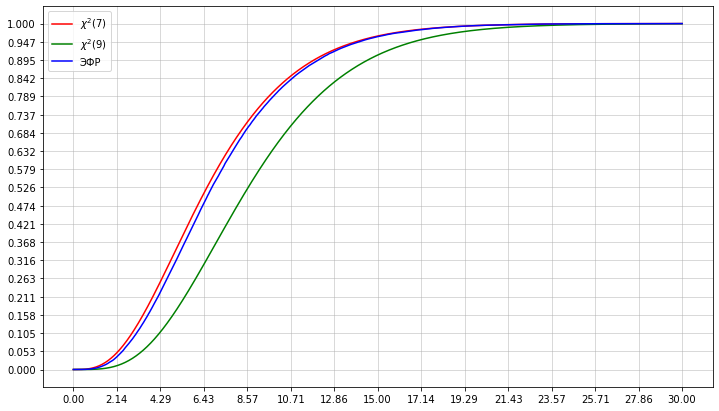

In [84]:
fig, ax = plt.subplots(figsize=(12,7))
ax.grid()

ax.set_xticks(np.linspace(0, max(points), 15))
ax.set_yticks(np.linspace(0, 1, 20))


ax.grid(which="major", alpha=0.6)
ax.legend(loc='best', prop={'size': 15})

ax.plot(points, hi_7, color = 'r', label ='$\chi ^{2}$(7)')
ax.plot(points, hi_9, color = 'g', label ='$\chi ^{2}$(9)')
ax.plot(points, deltas_func, color = 'b', label ='ЭФР')

ax.legend()